In [2]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import pandas as pd
import xarray as xr
import cartopy
import cartopy.crs as ccrs

In [4]:
#historical
fns1 = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Omon/so/gn/so_Omon_EC-Earth3_historical_r1i1p1f1_gn_185001-185012.nc'
multifns1 = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Omon/so/gn/*.nc'
ds1 = xr.open_dataset(fns1).so
multids1 = xr.open_mfdataset(multifns1).so
#SSP585
fns2 = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Omon/so/gn/so_Omon_EC-Earth3_ssp585_r1i1p1f1_gn_201501-201512.nc'
multifns2 = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Omon/so/gn/*.nc'
ds2 = xr.open_dataset(fns2).so
multids2 = xr.open_mfdataset(multifns2).so

past = multids1.sel(time = slice("1900-01-01", "1930-12-31")).isel(j=range(0,75))
meanpast = past.mean('time')

recent = multids1.sel(time = slice("1984-01-01", "2014-12-31")).isel(j=range(0,75))
meanrecent = recent.mean('time')

future = multids2.sel(time = slice("2070-01-01", "2100-12-31")).isel(j=range(0,75))
meanfuture = future.mean('time')

meanpast.to_netcdf("/usr/people/ijzerman/GradProject/DataFiles/so/sopast.nc")
meanrecent.to_netcdf("/usr/people/ijzerman/GradProject/DataFiles/so/sorec.nc")
meanfuture.to_netcdf("/usr/people/ijzerman/GradProject/DataFiles/so/sofut.nc")

In [45]:
dsrec = xr.open_dataarray('/usr/people/ijzerman/GradProject/DataFiles/so/sorec.nc')
dsfut = xr.open_dataarray('/usr/people/ijzerman/GradProject/DataFiles/so/sofut.nc')

In [46]:
diff = dsfut - dsrec 
# diff = xr.Dataset.to_array(dsfut) - xr.Dataset.to_array(dsrec) 
diff

<xarray.DataArray 'so' (lev: 75, j: 75, i: 362)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.18245316, -0.18044662, -0.17769241, ..., -0.18327332,
         -0.18245316, -0.18044662],
        [-0.17733383, -0.1730957 , -0.16846466, ..., -0.17564392,
         -0.17733383, -0.1730957 ],
        [-0.16530609, -0.15394974, -0.14496613, ..., -0.17279434,
         -0.16530609, -0.15394974]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * lev        (lev) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * j          (j) int32 1 2 3 4 5 6 7 8 9 10 ... 66 67 68 69 70 71 72 73 74 75
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 355 356 357 358 359 360 361 362
    latitude   (j, i) float64 -78.39 -78.39 -78.39 ... -49.41 -49.41 -49.41
    longitude  (j, i) float64 72.5 73.5 74.5 75.5 76.5 ... 70.5 71.5 72.5 73.5

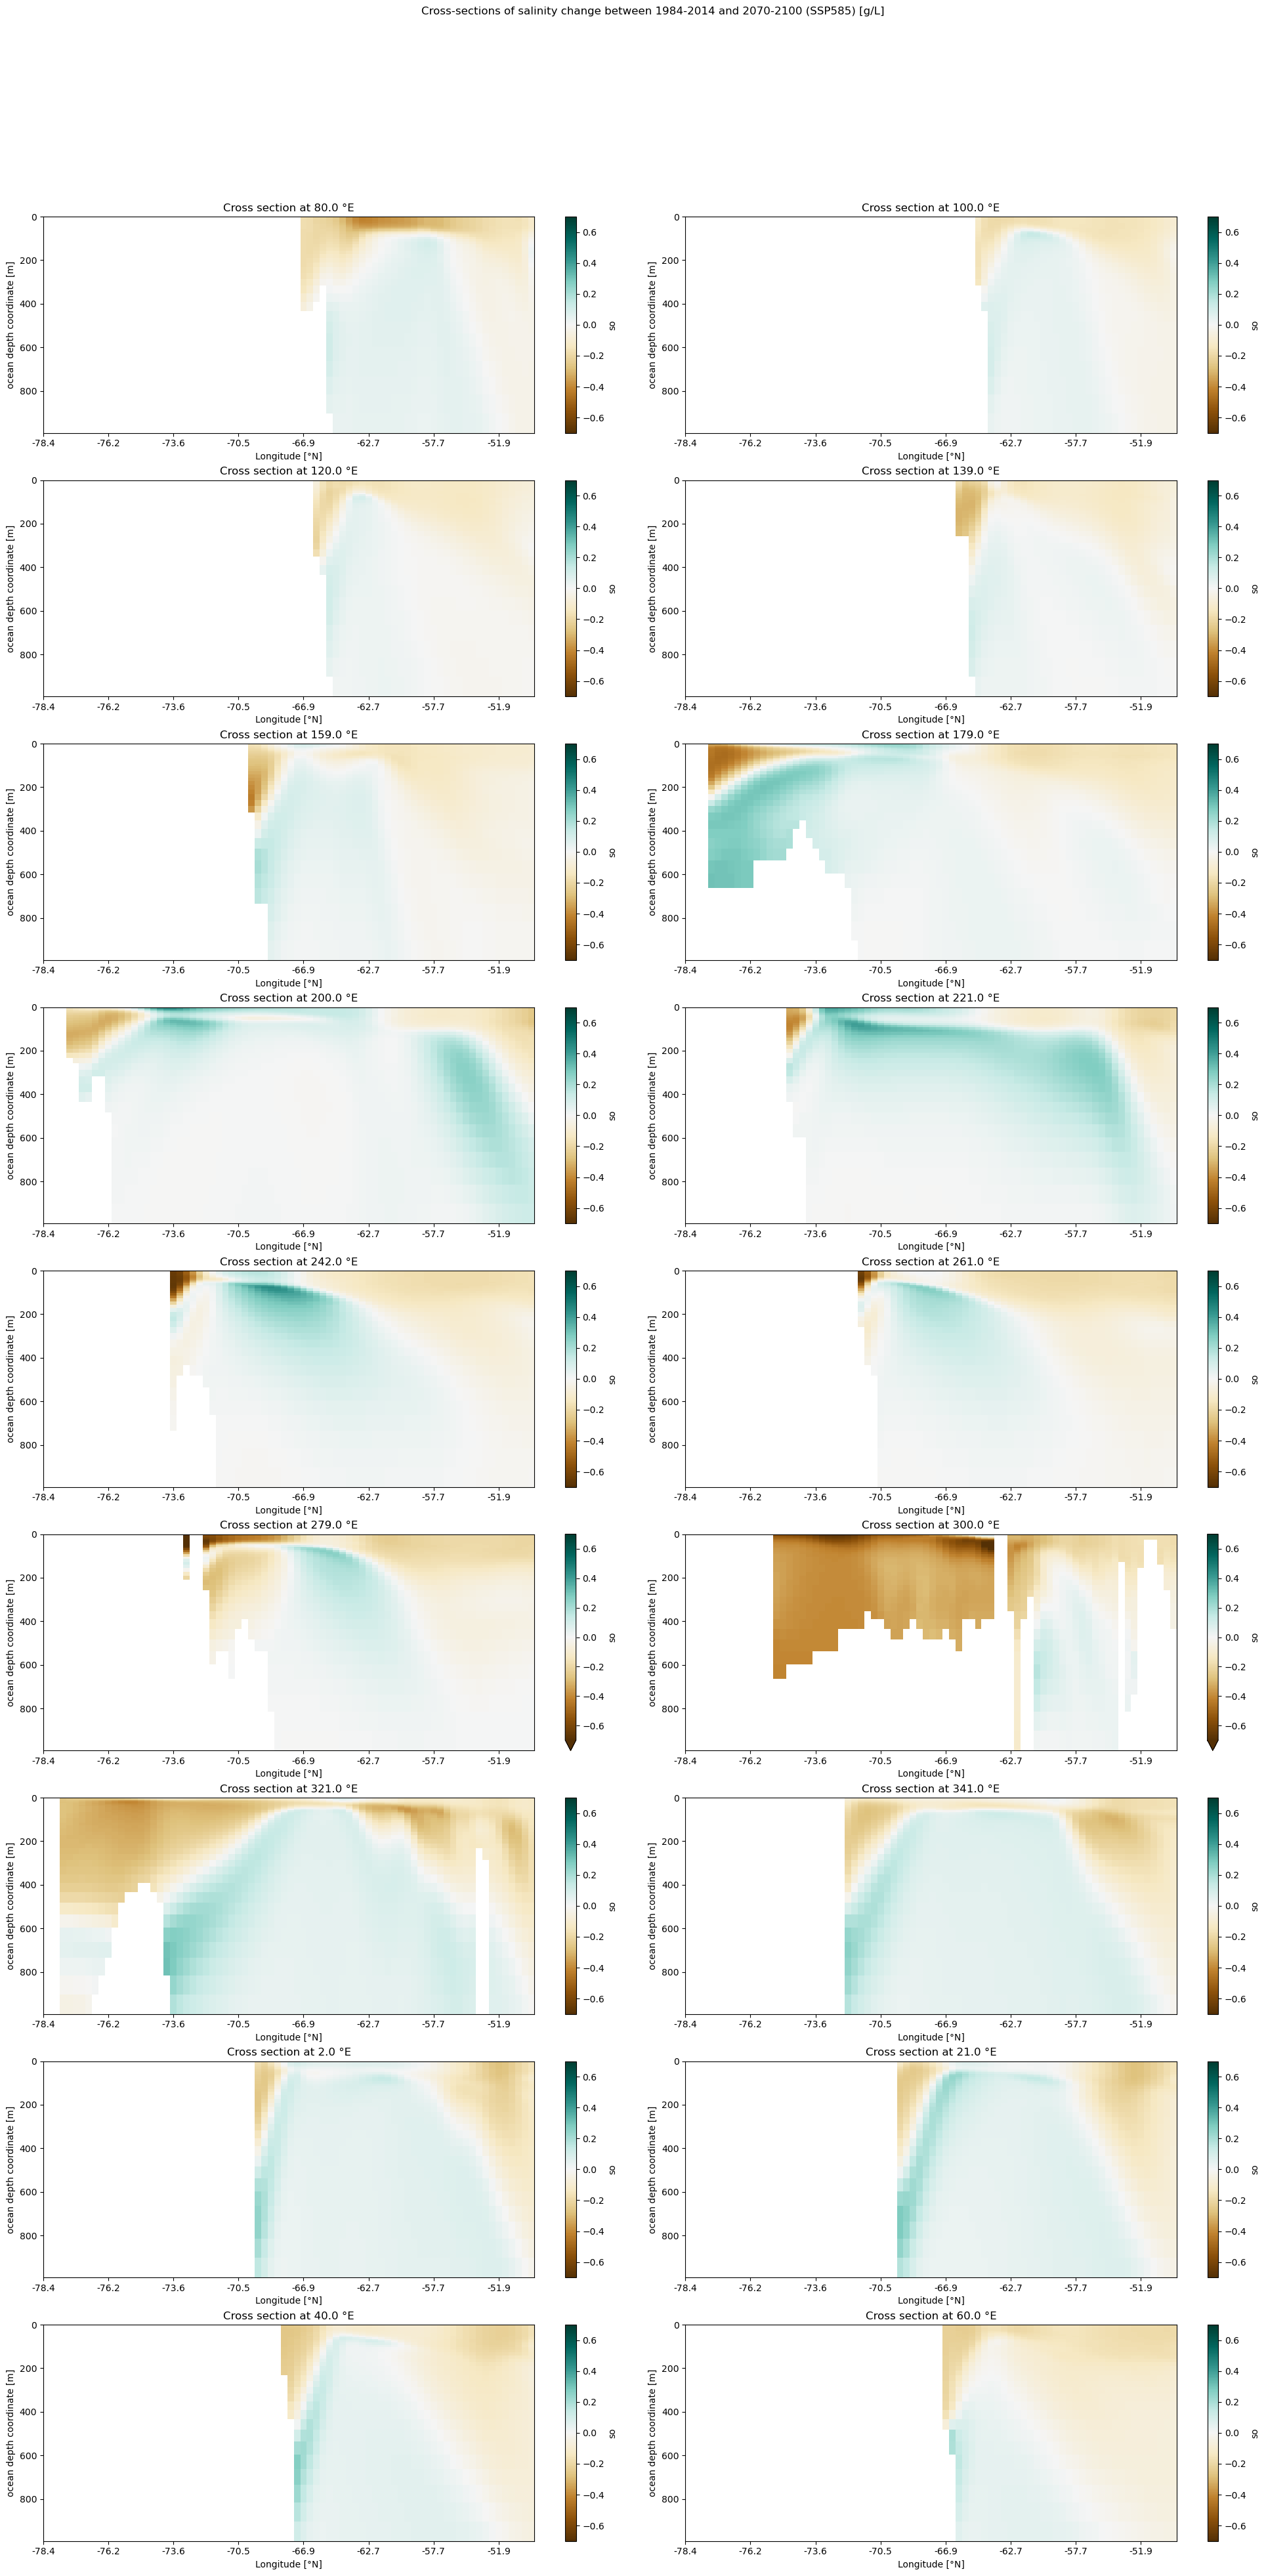

In [48]:
num_plots = len(range(0, 360, 20))
cols = 2  # Number of columns in the subplot grid
rows = (num_plots + cols - 1) // cols  # Calculate the number of rows

fig, axs = plt.subplots(rows, cols, figsize=(20, 40))

for idx, ax, in zip(range(8, 368, 20), axs.flat):
    im = diff.isel(i=diff.i[idx]).isel(lev=range(0, 46)).plot(cmap='BrBG', vmin=-0.7, vmax=0.7, ax=ax)
    ax.invert_yaxis()
    ax.set_title(f"Cross section at {str(np.round(diff.longitude.isel(i=idx, j=1).values,0))} °E")
    ax.set_xticks(range(0, 75, 10))
    ax.set_xticklabels(np.round(diff.latitude.isel(i=1, j=range(0,75,10)).values,1))
    ax.set_xlabel('Longitude [°N]')

    #axins = ax.inset_axes([0.1, 0.1, 0.2, 0.3], projection=ccrs.SouthPolarStereo())
    #axins.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    #axins.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='gray')
    #axins.add_feature(cartopy.feature.OCEAN)
    #axins.gridlines()

    # Make circular inset map
    #circle = PathPatch(Path.circle((0.5, 0.5), radius=0.5), transform=axins.transAxes, facecolor='none', edgecolor='black')
    #axins.add_patch(circle)


# Hide any remaining empty subplots
for ax in axs.flat[num_plots:]:
    ax.axis('off')

plt.suptitle('Cross-sections of salinity change between 1984-2014 and 2070-2100 (SSP585) [g/L]')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

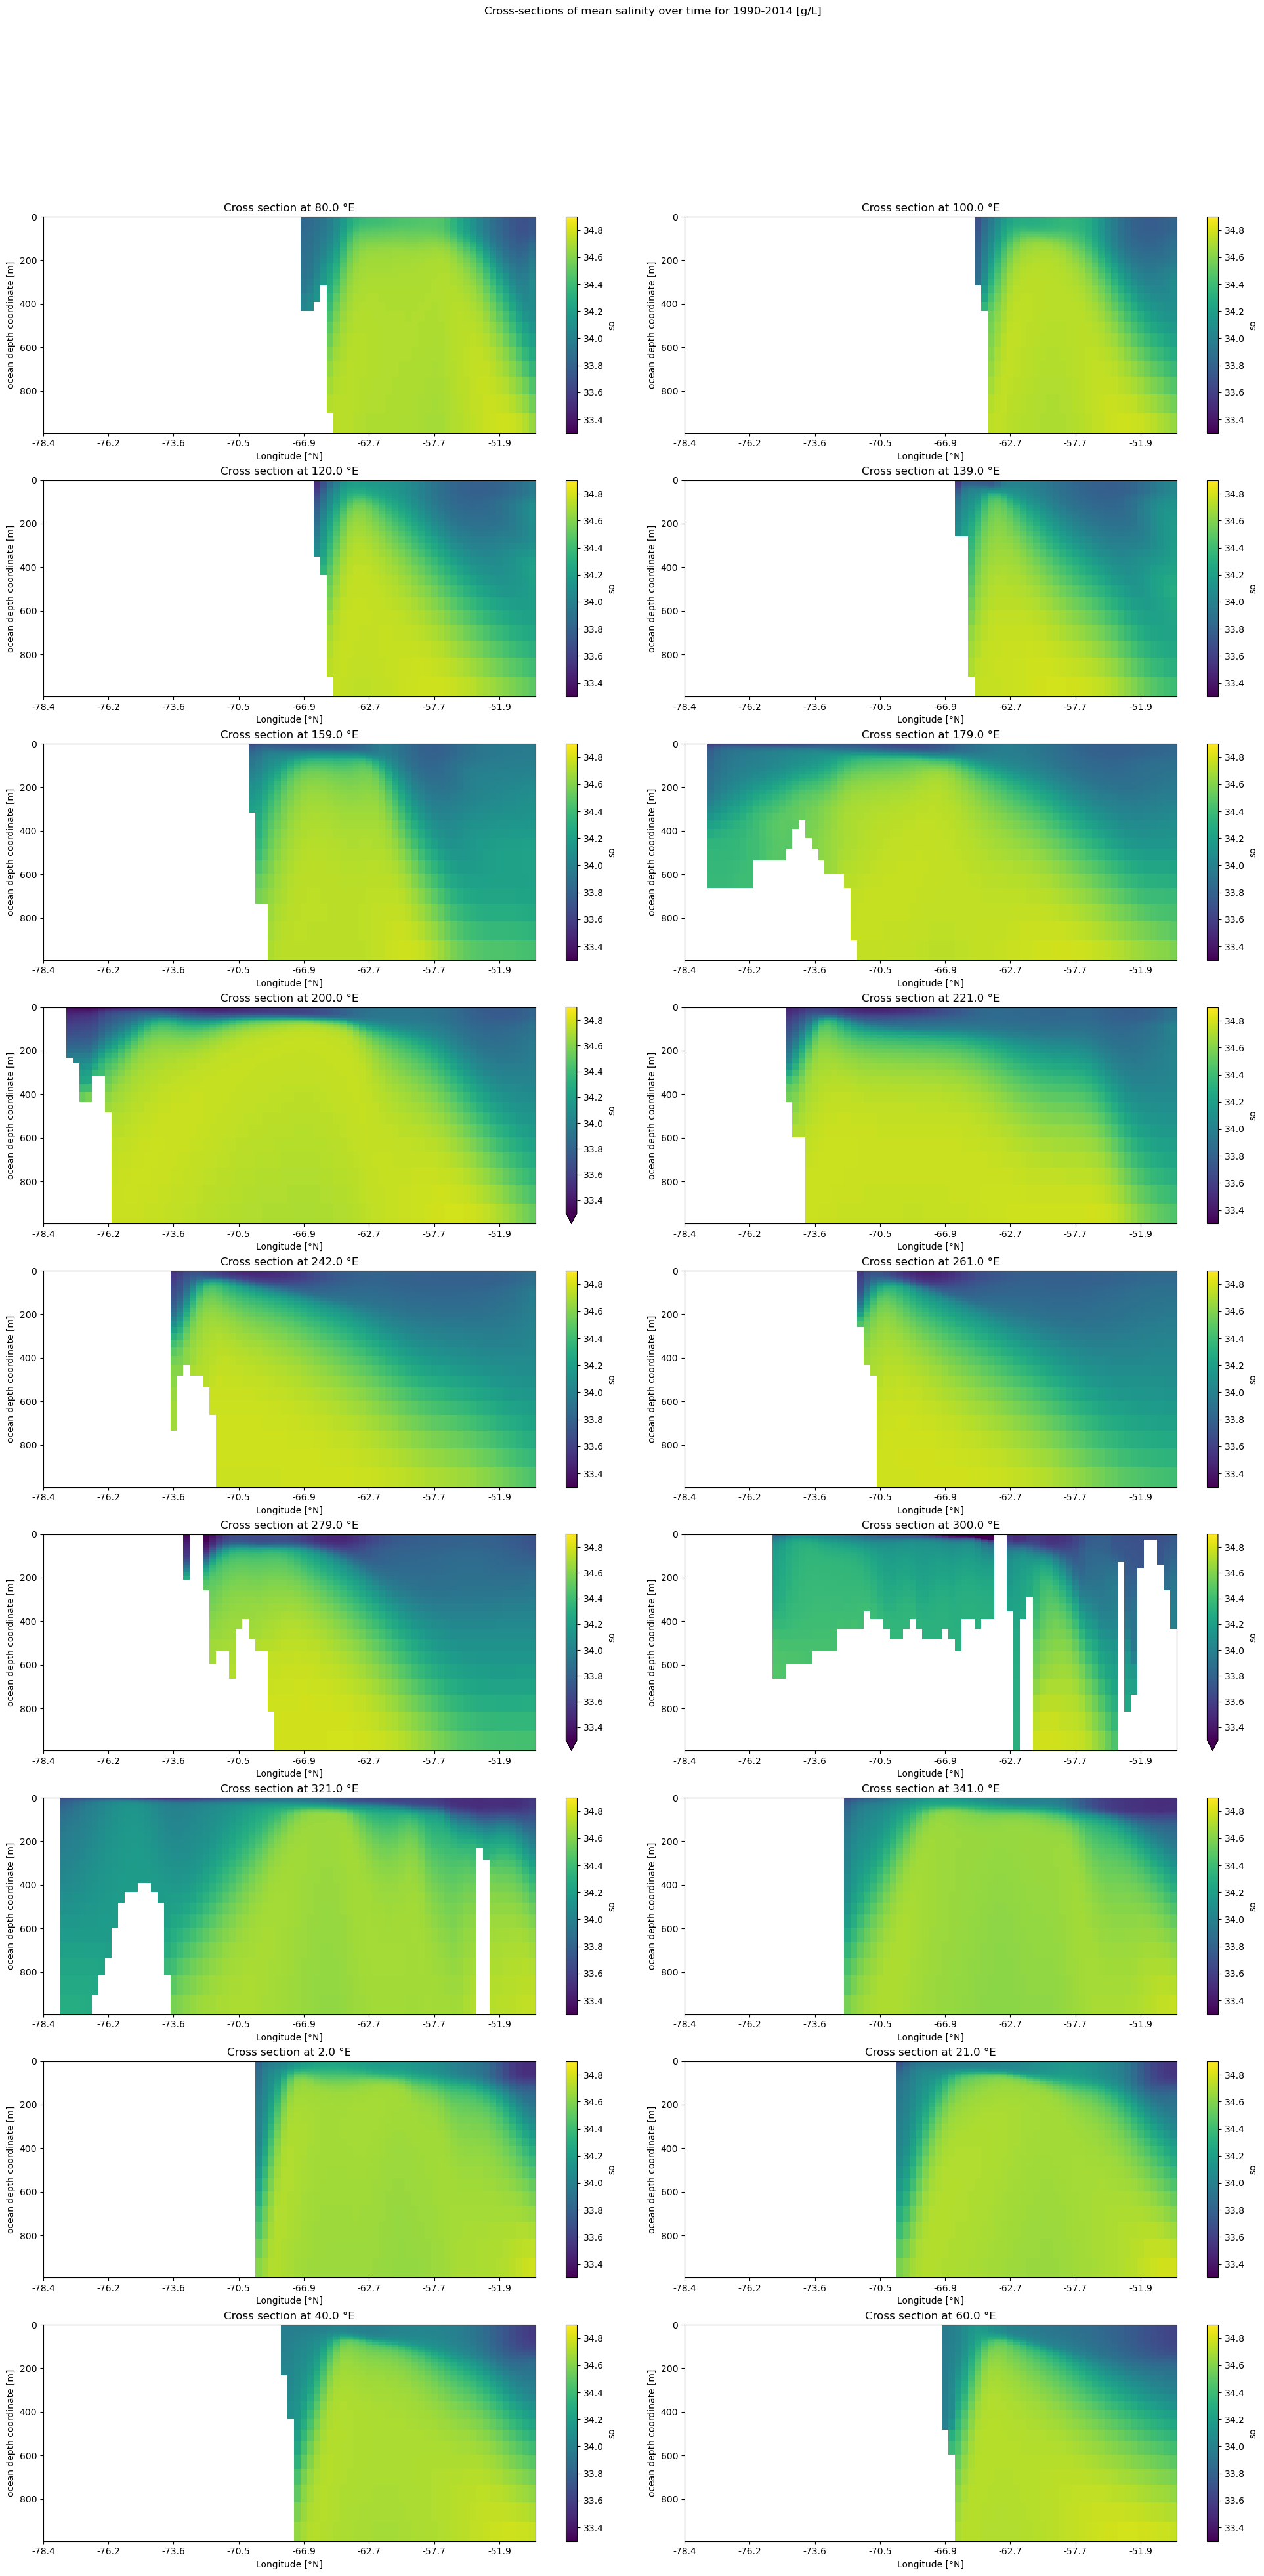

In [43]:
num_plots = len(range(0, 360, 20))
cols = 2  # Number of columns in the subplot grid
rows = (num_plots + cols - 1) // cols  # Calculate the number of rows

fig, axs = plt.subplots(rows, cols, figsize=(20, 40))

for idx, ax, in zip(range(8, 368, 20), axs.flat):
    im = dsrec.isel(i=dsrec.i[idx]).isel(lev = range(0,46)).plot(cmap='viridis', vmin = 33.3, vmax= 34.9, ax=ax) 
    ax.invert_yaxis()
    ax.set_title(f"Cross section at {str(np.round(dsrec.longitude.isel(i=idx, j=1).values,0))} °E")
    ax.set_xticks(range(0, 75, 10))
    ax.set_xticklabels(np.round(dsrec.latitude.isel(i=1, j=range(0,75,10)).values,1))
    ax.set_xlabel('Longitude [°N]')

    #axins = ax.inset_axes([0.1, 0.1, 0.2, 0.3], projection=ccrs.SouthPolarStereo())
    #axins.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    #axins.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='gray')
    #axins.add_feature(cartopy.feature.OCEAN)
    #axins.gridlines()

    # Make circular inset map
    #circle = PathPatch(Path.circle((0.5, 0.5), radius=0.5), transform=axins.transAxes, facecolor='none', edgecolor='black')
    #axins.add_patch(circle)


# Hide any remaining empty subplots
for ax in axs.flat[num_plots:]:
    ax.axis('off')

plt.suptitle('Cross-sections of mean salinity over time for 1984-2014 [g/L]')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()